## <b>NumPy<b>

Documentation: https://numpy.org/doc/

For the collection of numerical data of the same type, it is most of the time more efficient to use the type NumPy array instead of a generic list. A NumPy array is a datatype, that can hold elements with a fixed size. With NumPy arrays operations with the elements can be performed (signicificantly!) faster.

<div class="alert alert-block alert-info">
    numpy has to be imported
</div>

In [1]:
import numpy as np

### <b>Manually construct NumPy arrays</b>

#### One dimensional

In [2]:
[0, 1, 2, 3]

[0, 1, 2, 3]

In [3]:
a = np.array([0, 1, 2, 3])
a.ndim

1

In [4]:
a

array([0, 1, 2, 3])

In [5]:
a.shape

(4,)

In [6]:
len(a)

4

#### 2-D, 3-D, ..., n-D

In [7]:
b = np.array([[0, 1, 2], [3, 4, 5]])    # 2 x 3 array
b

array([[0, 1, 2],
       [3, 4, 5]])

In [8]:
b.ndim

2

In [9]:
b.shape

(2, 3)

In [10]:
len(b)

2

<div class="alert alert-block alert-info">
"len" returns the length of the first dimension
</div>

In [11]:
c = np.array([[[1], [2]], [[3], [4]]])
c

array([[[1],
        [2]],

       [[3],
        [4]]])

In [12]:
c.shape

(2, 2, 1)

There are multiple functions to create arrays:

* np.arange: returns array with equally spaced values
* np.linspace: returns array with given number of values
* np.ones / np.zeros: returns array with fixed values
* np.eye / np.diag: returns diagonal array
* ...

### <b>Restructure arrays</b>

In [13]:
b = np.arange(0, 20)
b

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

Restructure values in the 2-dimensional array with 4 rows and 5 columns

In [14]:
c = np.reshape(b, (4,5)) # neue Form des Arrays: 4x5
c

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

If you specify one dimension as `-1`in the function `np.reshape()`, this *free* dimension will be chosen to be fitted to the array dimensions and the number of elements.

In [15]:
c = np.reshape(b, (5,-1)) 
c.shape

(5, 4)

In [16]:
c = np.reshape(c, (10,-1)) 
c.shape

(10, 2)

In [17]:
c

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13],
       [14, 15],
       [16, 17],
       [18, 19]])

*Flatten* of a multidimensional array to a one-dimensional array

In [18]:
d = c.flatten()
d

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

Add new array dimensions

In [19]:
a = np.array([1, 2, 3, 4, 5])
a

array([1, 2, 3, 4, 5])

In [20]:
b = a[:, np.newaxis]
b

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [21]:
b

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [22]:
c = a[np.newaxis, :]
c

array([[1, 2, 3, 4, 5]])

In [23]:
c.shape

(1, 5)

### <b>Indexing</b>


Values stored in an array can be accessed similarly to values in a list. Slicing works similar to lists, too.
<div class="alert alert-block alert-info">
The index always starts at 0!

#### Regulär

In [24]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [25]:
a[0], a[2], a[-1]

(0, 2, 9)

In [26]:
a[0::2]

array([0, 2, 4, 6, 8])

For multidimensional arrays: Indexing of rows and columns

In [27]:
b = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
b

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [28]:
b[:] # Returns the whole array

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [29]:
b[:, 0] # all rows, first column

array([1, 5, 9])

In [30]:
b[2, :] # third row, all columns

array([ 9, 10, 11, 12])

In [31]:
b[[0,2], :] # first and third row, all columns

array([[ 1,  2,  3,  4],
       [ 9, 10, 11, 12]])

#### Using a bool mask

In [32]:
np.random.seed(3)
a = np.random.randint(0, 21, 15)
a

array([10,  3,  8,  0, 19, 10, 11,  9, 10,  6,  0, 20, 12,  7, 14])

In [33]:
mask = (a % 3) == 0
~mask

array([ True, False,  True, False,  True,  True,  True, False,  True,
       False, False,  True, False,  True,  True])

Get only the values at the position, where the condition evaluates to `True`.

In [34]:
a[mask]

array([ 3,  0,  9,  6,  0, 12])

Invertieren der Maske mittels `~`

In [35]:
a[~mask]

array([10,  8, 19, 10, 11, 10, 20,  7, 14])

In [36]:
a[a % 3 == 0] = -1
a

array([10, -1,  8, -1, 19, 10, 11, -1, 10, -1, -1, 20, -1,  7, 14])

### <b>Arithmetic operations</b>

In [37]:
a = np.array([1, 2, 3, 4, 5])
a + 1

array([2, 3, 4, 5, 6])

In [38]:
a * 4

array([ 4,  8, 12, 16, 20])

<div class="alert alert-block alert-info">
The order of operations is important!
</div>

In [39]:
a ** 2

array([ 1,  4,  9, 16, 25])

$\Rightarrow x^2~\forall x \in a$

In [40]:
2 ** a

array([ 2,  4,  8, 16, 32])

$\Rightarrow 2^x~\forall x \in a$

In [41]:
b = np.ones(5) + 1
print(b)
a - b

[2. 2. 2. 2. 2.]


array([-1.,  0.,  1.,  2.,  3.])

In [42]:
a * b

array([ 2.,  4.,  6.,  8., 10.])

Dot product betwenn two 1D arrays

In [43]:
np.dot(a, b)
# alternativ:
a @ b

30.0

In [44]:
j = np.arange(5)
2 ** (j + 1) - j

array([ 2,  3,  6, 13, 28])

Speed of the operations:

In [45]:
a = np.arange(10000)
%timeit a + 1

1.56 µs ± 46 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [46]:
l = range(10000)
%timeit [i+1 for i in l] 

299 µs ± 2.56 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


<div class="alert alert-block alert-info">
    NumPy operations are most of the time a lot faster than operations on lists!
    Read more here: <a>https://towardsdatascience.com/how-to-make-your-pandas-loop-71-803-times-faster-805030df4f06</a>
</div>

Array multiplications:

In [47]:
c = np.ones((3,3))
c * c

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

Matrix multiplications:

In [48]:
c.dot(c)

array([[3., 3., 3.],
       [3., 3., 3.],
       [3., 3., 3.]])

<div class="alert alert-block alert-info">
    Array multiplication is not a matrix multiplication!

Matrix multiplication of two 2D arrays

In [49]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = np.array([[1, 1, 2], [2, 0, 1], [1, 0, 2]])

np.matmul(a, b)
# alternativ:
a @ b

array([[ 8,  1, 10],
       [20,  4, 25],
       [32,  7, 40]])

### <b>Reductions</b>

*Reductions*: Reduce the dimension of an array, e.g. reduce a 1D array to a scalar value or a 2D array to a 1D array.

#### 1D

In [50]:
x = np.array([1, 2, 3, 4])
np.sum(x)

10

In [51]:
x.sum()

10

<div class="alert alert-block alert-info">
    <b>Warning:</b> This syntax does not work for all array functions! Preferred: <code>np.function()</code>.
</div>

#### 2D

In [52]:
x = np.array([[1, 2], [3, 4]])
x

array([[1, 2],
       [3, 4]])

The `axis` parameter can be used in many functions to specify on which dimension the operation should be performed.

In [53]:
x.sum(axis=0)   # columns (first dimension)

array([4, 6])

In [54]:
# Check: sum of the individual columns
print("Spalte 1: {}".format(x[:, 0].sum()))
print("Spalte 2: {}".format(x[:, 1].sum()))

Spalte 1: 4
Spalte 2: 6


In [55]:
x.sum(axis=1)   # rows (second dimension)

array([3, 7])

In [56]:
# Check: sum of the individual rows
print("Zeile 1: {}".format(x[0, :].sum()))
print("Zeile 2: {}".format(x[1, :].sum()))

Zeile 1: 3
Zeile 2: 7


In [57]:
x.sum(axis=None)

10

#### Minimum & maximum

In [58]:
np.min(x), np.max(x)

(1, 4)

In [59]:
np.argmin(x), np.argmax(x) # Index of the minimum and maximum

(0, 3)

#### Mean, median, std

In [60]:
x = np.array([1, 2, 3, 1])
y = np.array([[1, 2, 3], [5, 6, 1]])

In [61]:
np.mean(x)

1.75

In [62]:
print(np.mean(y)) # axis = None => Mean of all values (reduction of 2 dimensions)
print(np.mean(y, axis=0)) # Mean of all columnsMittelwert entlang der Spalten
print(np.mean(y, axis=1)) # Mittelwert entlang der Zeilen

3.0
[3. 4. 2.]
[2. 4.]


In [63]:
np.median(x)

1.5

In [64]:
np.std(x)

0.82915619758885

#### Delete unnecessary dimensions

In [65]:
x = np.array([[1, 2, 3, 4, 5]])
x

array([[1, 2, 3, 4, 5]])

In [66]:
print(x.ndim)
print(x.shape)

2
(1, 5)


In [67]:
x = np.squeeze(x)
x

array([1, 2, 3, 4, 5])

In [68]:
print(x.ndim)
print(x.shape)

1
(5,)


### <b>Sort data</b>

In [69]:
a = np.array([[4, 3, 5], [1, 2, 1]])
a

array([[4, 3, 5],
       [1, 2, 1]])

In [70]:
a.sort(axis=1)
a

array([[3, 4, 5],
       [1, 1, 2]])

### <b>Missing values</b>

Missing values in Python are typically noted with `None`or `NaN` (not a number) 

In [71]:
x = np.array([1, 2, 3, np.nan, 5, 6]) # 4. Arrayeintrag fehlt
x

array([ 1.,  2.,  3., nan,  5.,  6.])

In [72]:
np.sum(x), np.mean(x), np.std(x)

(nan, nan, nan)

<div class="alert alert-block alert-info">
    <b>Caution:</b> Some functions do not work as expected if NaN values are contained in an arry. Never replace missing values with "unrealistic" numbers (e.g. -77.0, as typically used in SPSS).
</div>

#### 1D arrays

**Option I**: Usage of specialized nan-safe functions, that ignore nan values

In [73]:
np.nansum(x), np.nanmean(x), np.nanstd(x)

(17.0, 3.4, 1.854723699099141)

**Option II**: Find and mask nan values

In [74]:
np.isnan(x) # bool Maske mit fehlenden Werten

array([False, False, False,  True, False, False])

In [75]:
np.sum(x[~np.isnan(x)]) # Nur Nicht-NaN-Werte werden in die Berechnung mit einbezogen

17.0

**Option III**: Remove nan values

In [76]:
y = x[~np.isnan(x)] # NaN-Werte werden entfernt
print(y)
np.sum(y)

[1. 2. 3. 5. 6.]


17.0

### <b>Multidimensional arrays</b>

Multidimensional arrays can be treated analogously:

In [77]:
x = np.array([[1, 2, 3], [4, np.nan, 5], [7, 8, np.nan], [np.nan, np.nan, np.nan]])
x

array([[ 1.,  2.,  3.],
       [ 4., nan,  5.],
       [ 7.,  8., nan],
       [nan, nan, nan]])

In [78]:
np.isnan(x)

array([[False, False, False],
       [False,  True, False],
       [False, False,  True],
       [ True,  True,  True]])

For 2D arrays, there are two possibilities to remove missing values:

**Option I**: Remove rows/columns, if **one** of the values is nan (`any`)

In [79]:
x[~np.isnan(x).any(axis=1)] # rows

array([[1., 2., 3.]])

In [80]:
x[:, ~np.isnan(x).any(axis=0)] # columns

array([], shape=(4, 0), dtype=float64)

**Option II**: Remove rows/columns if **all** values are nan (`all`)

In [81]:
x[~np.isnan(x).all(axis=1)] # rows

array([[ 1.,  2.,  3.],
       [ 4., nan,  5.],
       [ 7.,  8., nan]])

In [82]:
x[:, ~np.isnan(x).all(axis=0)] # columns

array([[ 1.,  2.,  3.],
       [ 4., nan,  5.],
       [ 7.,  8., nan],
       [nan, nan, nan]])

## <b>SciPy</b>

Documentation: https://docs.scipy.org/doc/scipy/reference/index.html

SciPy is a library containing algorithms and mathematical operations for the usage on numpy arrays:
* Linear algebra: `scipy.linalg`
* Statistics: `scipy.stats`
* Optimization: `scipy.opimize`
* Sparse matrices: `scipy.sparse`
* Signal processing: `scipy.signal`
* etc.

<div class="alert alert-block alert-info">
    Single components have to be imported

### Example: Signal filtering

In [83]:
from scipy.signal import sosfiltfilt, butter

A filter can be used to remove noise from a signal:

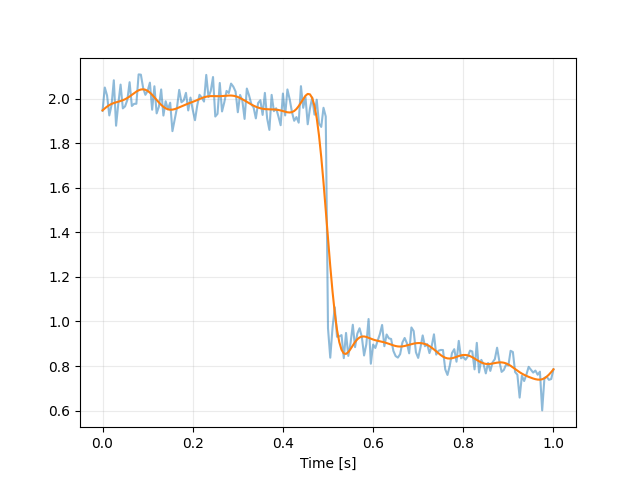

In [84]:
import matplotlib.pyplot as plt
%matplotlib widget 
n = 201
t = np.linspace(0, 1, n)
np.random.seed(123)
signal = 1 + (t < 0.5) - 0.25 * t ** 2 + 0.05 * np.random.randn(n) # example signal with noise
sos = butter(4, 0.125, output='sos')
signal_filt = sosfiltfilt(sos, signal)

fig, ax = plt.subplots()
ax.plot(t, signal, alpha=0.5, label='ungefiltertes Signal')
ax.plot(t, signal_filt, label='gefiltertes Signal')
#ax.legend(framealpha=1, shadow=True)
ax.grid(alpha=0.25)
ax.set_xlabel('Time [s]');
# more on plotting in the next videos